In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [14]:
df=pd.read_csv('/InfantMortalityRate.csv',encoding = "ISO-8859-1")
df.head()

,Country,Infant Mortality Rate,Gender,Year
0,Afghanistan,43.050731,Female,2019.0
1,Angola,44.851045,Female,2019.0
2,Albania,7.659442,Female,2019.0
3,Andorra,2.555451,Female,2019.0
4,United Arab Emirates,5.716825,Female,2019.0


In [15]:
#there are 229 unique countries
df.Country.nunique()

229

In [16]:
df.shape

(7625, 4)

In [17]:
print(df[df.duplicated()])

            Country  Infant Mortality Rate  Gender    Year
205   North America               4.954589  Female  2019.0
436   North America               5.035195  Female  2018.0
667   North America               5.100352  Female  2017.0
898   North America               5.154236  Female  2016.0
1129  North America               5.206922  Female  2015.0
1360  North America               5.257976  Female  2014.0
1591  North America               5.307824  Female  2013.0
1822  North America               5.387218  Female  2012.0
2053  North America               5.471592  Female  2011.0
2284  North America               5.553101  Female  2010.0
2515  North America               5.639329  Female  2009.0
2746  North America               5.901276    Male  2019.0
2977  North America               5.995441    Male  2018.0
3208  North America               6.068601    Male  2017.0
3439  North America               6.128684    Male  2016.0
3670  North America               6.191640    Male  2015

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7625 entries, 0 to 7624
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                7623 non-null   object 
 1   Infant Mortality Rate  7623 non-null   float64
 2   Gender                 7623 non-null   object 
 3   Year                   7623 non-null   float64
dtypes: float64(2), object(2)
memory usage: 238.4+ KB


In [19]:
df.isnull().sum()

Country                  2
Infant Mortality Rate    2
Gender                   2
Year                     2
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7623 entries, 0 to 7622
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                7623 non-null   object 
 1   Infant Mortality Rate  7623 non-null   float64
 2   Gender                 7623 non-null   object 
 3   Year                   7623 non-null   float64
dtypes: float64(2), object(2)
memory usage: 297.8+ KB


In [22]:
df.Gender.unique()

array(['Female', 'Male', 'Total'], dtype=object)

In [23]:
#separating the part with female infant mortality rate, male mortality rate and total mortlaity rate
df_females=df[df['Gender']=='Female']
df_males=df[df['Gender']=='Male']
df_total=df[df['Gender']=='Total']

In [24]:
print('shape of females dataset:',df_females.shape)

shape of females dataset: (2541, 4)


In [25]:
print('shape of male dataset:',df_males.shape)

shape of male dataset: (2541, 4)


In [26]:
print('shape of total dataset:',df_total.shape)

shape of total dataset: (2541, 4)


##Initial Visualisation


In [27]:
df_total.Year.unique()

array([2019., 2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009.])

In [28]:
index_names = df[ df['Gender'] == 'Total' ].index
index_names
# drop these row indexes
# from dataFrame
df_both_genders=df.drop(index_names)
df_both_genders.shape

(5082, 4)

In [29]:
df_both_genders.Gender.unique()

array(['Female', 'Male'], dtype=object)

<Figure size 1728x864 with 0 Axes>

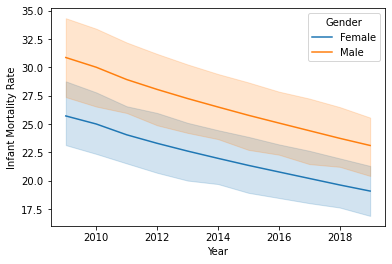

<Figure size 1728x864 with 0 Axes>

In [30]:
sns.lineplot(x=df_both_genders['Year'],y=df_both_genders['Infant Mortality Rate'],hue=df_both_genders['Gender'])
plt.figure(figsize=(24,12))
#first insight is that the IMR is coming down.
# 2nd is that the IMR for males is higher than the IMR for females.

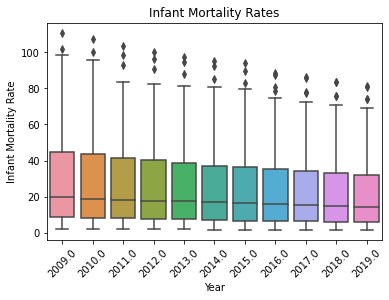

In [32]:
plt.xticks(rotation=45)
plt.title('Infant Mortality Rates')
sns.boxplot(x= df_total['Year'], y= df_total['Infant Mortality Rate'])

In [44]:
IMR_2019=df_total[df_total['Year']==2019]
IMR_2019.describe()

,Infant Mortality Rate,Year
count,231.000000,231.0
mean,21.160393,2019.0
std,18.672680,0.0
min,1.493181,2019.0
25%,5.846095,2019.0
50%,14.486694,2019.0
75%,32.241502,2019.0
max,81.003217,2019.0


In [40]:
df_total['Year'] = df_total['Year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


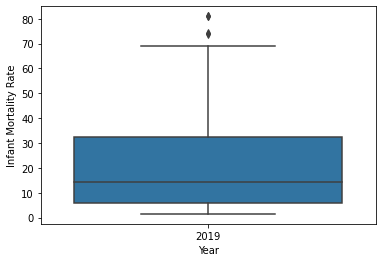

In [50]:
sns.boxplot(x=IMR_2019['Year'],y=IMR_2019['Infant Mortality Rate'])

In [46]:
q1=IMR_2019['Infant Mortality Rate'].quantile(0.25)
Q3=IMR_2019['Infant Mortality Rate'].quantile(0.75)
print("q1:",q1,"q3:",Q3)

q1: 5.8460945332872996 q3: 32.241501948547


In [47]:
IQR=Q3-q1
print(IQR)

26.395407415259697


In [49]:
#upper whisker
upper_whisker=Q3+1.5*(IQR)
lower_whisker=q1-1.5*(IQR)
print(upper_whisker,lower_whisker)

71.83461307143654 -33.74701658960225


In [53]:
# countries which are the outliers with extremely high infant mortality rates
countries_with_high_IMR=IMR_2019[IMR_2019['Infant Mortality Rate']>upper_whisker]
countries_with_high_IMR

,Country,Infant Mortality Rate,Gender,Year
5110,Central African Republic,81.003217,Total,2019
5208,Nigeria,74.160317,Total,2019
5237,Sierra Leone,80.921036,Total,2019
5240,Somalia,74.032143,Total,2019


In [57]:
countries_in_the_lower_50_percent=IMR_2019[IMR_2019['Infant Mortality Rate']>IMR_2019['Infant Mortality Rate'].quantile(0.5)]
countries_in_the_lower_50_percent.sort_values(by='Infant Mortality Rate',ascending=True,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [58]:
countries_in_the_lower_50_percent.head(5)

,Country,Infant Mortality Rate,Gender,Year
5152,Grenada,14.681129,Total,2019
5298,Uzbekistan,15.574520,Total,2019
5258,Trinidad and Tobago,15.655800,Total,2019
5221,Palau,15.779705,Total,2019
5301,Viet Nam,15.884507,Total,2019


In [59]:
countries_in_the_lower_50_percent.tail(5)

,Country,Infant Mortality Rate,Gender,Year
5251,Chad,69.095999,Total,2019
5240,Somalia,74.032143,Total,2019
5208,Nigeria,74.160317,Total,2019
5237,Sierra Leone,80.921036,Total,2019
5110,Central African Republic,81.003217,Total,2019


In [67]:
top_countries=IMR_2019.sort_values(by='Infant Mortality Rate',ascending=True)
top_countries.head()

,Country,Infant Mortality Rate,Gender,Year
5239,San Marino,1.493181,Total,2019
5164,Iceland,1.553077,Total,2019
5246,Slovenia,1.660515,Total,2019
5169,Japan,1.797329,Total,2019
5125,Cyprus,1.839560,Total,2019
